# Projeto Final - Econometria 1
Lucas Rabay Butcher

In [1]:
''' importando bibliotecas necessárias '''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Teste da classe autoral
from SimpleLinearRegression import SimpleLinearRegression

### **1 - Discriminação no Mercado de Trabalho**

Aqui analisaremos um conjunto de dados com informações sobre o salário e informações demográficas de alguns trabalhadores. As informações contidas nesse *dataset* são:

- **salario** : Valor do salário do indivíduo.
- **exp** : Anos de experiência no mercado de trabalho.
- **educ** : Anos de educação formal do indivíduo.
- **homem** : variável binária (dummy), que indica se o indivíduo é ou não do sexo masculino.

In [3]:
'''' Carregando os dados e conferindo '''
salarios_df = pd.read_csv('data/salario_mercado.csv')
salarios_df

,salario,exp,educ,homem
0,3.333333,5,5.0,1
1,6.000000,10,12.0,1
2,146.666667,16,12.0,1
3,53.333333,18,12.0,1
4,133.333333,20,14.0,0
...,...,...,...,...
5248,200.000000,48,12.0,1
5249,66.666667,6,13.0,1
5250,400.000000,48,9.0,0
5251,280.000000,44,7.0,0


In [4]:
''' Checando Valores Nulos '''
salarios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5253 entries, 0 to 5252
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   salario  5253 non-null   float64
 1   exp      5253 non-null   int64  
 2   educ     5249 non-null   float64
 3   homem    5253 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 164.3 KB


In [5]:
'''Definindo valores nulos para educ como 0'''
salarios_df['educ'] = salarios_df['educ'].fillna(0)

#### **1.1** Vamos rodar agora uma especificação básica de uma Equação de *Mincer*. Definida por:

$$\ln(\text{salario}) = \beta_0 + \beta_1 \cdot \text{educ} + \beta_2 \cdot \text{homem} + \epsilon$$

Onde:

$$1. \ln(\text{salario})$$

É o logaritmo natural do salário. A utilização do logaritmo natural permite linearizar a relação entre os salários e as variáveis independentes, facilitando a interpretação dos coeficientes como mudanças percentuais.

$$2. \beta_0$$

É o intercepto da equação. Representa o valor esperado da função quando todas as variáveis independentes (educ e homem) são iguais a zero.

$$3. \beta_1$$

Representa a variação no logaritmo do salário associada a um aumento de uma unidade na variável **educ** (anos de escolaridade).

$$4. \beta_2$$

Indica a diferença no logaritmo do salário entre homens e mulheres.

$$5. \epsilon$$

Representada a parte não observada da função salário, ou o erro aleatório.


In [6]:
''' Adicionando a coluna log_salario, para melhor analisar '''
salarios_df['log_salario'] = np.log(salarios_df['salario'])

In [7]:
''' Definindo variáveis independentes e intercepto '''
X = salarios_df[['educ', 'homem']]
X = sm.add_constant(X)

''' Definindo variável dependente '''
y = salarios_df['log_salario']

''' Rodando modelo '''
model = sm.OLS(y, X).fit()

#### **1.2** Interpretando resultados

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_salario   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     449.9
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          4.40e-181
Time:                        12:13:07   Log-Likelihood:                -6611.5
No. Observations:                5253   AIC:                         1.323e+04
Df Residuals:                    5250   BIC:                         1.325e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9378      0.045    110.833      0.000       4.850       5.025
educ           0.0994      0.003     29.971      0.000       0.093       0.106
homem         -0.0330      0.024     -1.404      0.160      -0.079       0.013
==============================================================================
Omnibus:                      781.734   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1493.771
Skew:                          -0.930   Prob(JB):                         0.00
Kurtosis:                       4.834   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


##### *Resposta da 1.2*

**1. B_1 = 0,0994** - Este resultado indica que a cada alteração unitária em educ, ou seja a cada ano de educação a mais, há um aumento de 9,94% no salário dos individuos. Obtendo assim um resultado esperado, em que a educação influencia positivamente na remuneração do profissional. 

**2. B_2 = -0,33** - Resultado bastante surpreendente, que indica que homens tendem a ganahr aproximadamente -3,3% do que as mulheres, mantendo nível de educação constante. No entanto, observamos que o P-valor de 0,160 indica que esse resultado não é estatisticamente significante

**3 R^2 = 0.146** - Porém, observamos que nosso modelo representa apenas 14% da composição de ln(salario), ou seja, muitos outros fatores estão de fora do modelo.

### **2 - Taxa de glicose e incidência de Diabetes**

Nesta parte, será analisado um conjunto de dados com informações de saúde de uma determinada
população, como parte de um estudo para prever diabetes em mulheres adultas (com 21 anos ou mais).
As seguintes variáveis estão incluídas nos banco diabetes_dados.csv :

- **n_gravidez** : Número de vezes que a pessoa ficou grávida
- **glicose** : Concentração de glicose plasmática 2 horas após um teste oral de tolerância à glicose
- **pressao_arterial** : Pressão arterial diastólica (mm Hg)
- **insulina** : Nível de insulina sérica após 2 horas (mu U/ml)
- **imc** : Índice de massa corporal (peso em kg/(altura em m)2)
- **idade** : Idade (anos)
- **diabetes** : Variável de dummy (0 = sem diabetes ou 1 = com diabetes)
  
1. Apresente uma tabela descritiva de dados contendo média e desvio padrão para cada variável
2. Faça um gráfico relacionando idade e o nível de glicose. Em seguida, relacione pressão arterial e o
IMC. Quais conclusões podemos tirar dessas relações?
3. Agora, estime um modelo de regressão para as duas relações anteriores. Discuta detalhadamente
os resultados dos estimadores e as conclusões obtidas. Para os dois casos, construa o intervalo de
confiança a 95% utilizando a função confint() e discuta os resultados.
4. Visualize o modelo estimado através da adição da reta de ajuste ao gráfico de dispersão plotado
anteriormente.
5. Temos uma variável chamada n_gravidez , que fornece o número de gestações anteriores. Crie
uma variável dummy chamada d_gravidez : qualquer mulher com 1 ou mais gestações será
codificada como 1; e qualquer mulher sem histórico de gravidez será codificada como 0.
6. Agora rode o modelo com o nível de glicose como variável dependente e idade e a dummy de gravidez
como variáveis independentes. Como podemos interpretar os coeficientes e quais conclusões
podemos tirar do resultado da estimação?



In [51]:
"""Import Modules"""

#Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
#Data Preprocessing
from sklearn.model_selection import train_test_split
#Model
from sklearn.linear_model import LinearRegression

#### **Leitura dos Dados**

In [30]:
file_path = 'data/diabetes_dados.csv'

df_diabetes = read_csv(file_path)
df_diabetes.head()

,n_gravidez,glicose,pressao_arterial,insulina,imc,idade,diabetes
0,6,148,72,0,33.6,50,1
1,1,85,66,0,26.6,31,0
2,8,183,64,0,23.3,32,1
3,1,89,66,94,28.1,21,0
4,0,137,40,168,43.1,33,1


#### **Informações Gerais**

In [32]:
print("Schema dos dados\n")
df_diabetes.info()

Schema dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   n_gravidez        768 non-null    int64  
 1   glicose           768 non-null    int64  
 2   pressao_arterial  768 non-null    int64  
 3   insulina          768 non-null    int64  
 4   imc               768 non-null    float64
 5   idade             768 non-null    int64  
 6   diabetes          768 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 42.1 KB


In [33]:
"""Descrição Estatística dos Dados"""
df_diabetes.select_dtypes(include=['float64', 'int64']).describe()

,n_gravidez,glicose,pressao_arterial,insulina,imc,idade,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,81.000000,1.000000


### **Relações**

* ``Idade`` x ``Nível de Glicose``. 
* ``Pressão Arterial`` x ``IMC``.

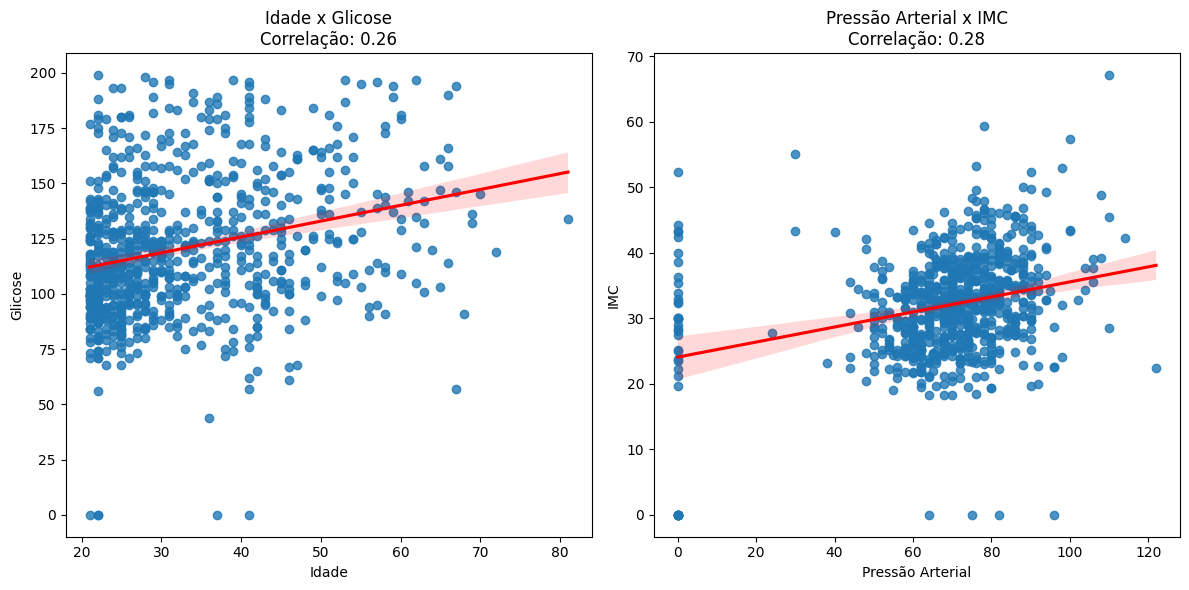

In [63]:
"""Correlação entre as variáveis"""

# Idade x Glicose
idade_glicose_corr = df_diabetes['idade'].corr(df_diabetes['glicose'])
# Pressão Arterial x IMC
pressao_IMC = df_diabetes['pressao_arterial'].corr(df_diabetes['imc'])

# Gráfico Idade x Glicose 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.regplot(x='idade', y='glicose', data=df_diabetes, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title(f'Idade x Glicose\nCorrelação: {idade_glicose_corr:.2f}')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Glicose')
# Gráifco Pressão Arterial x IMC
sns.regplot(x='pressao_arterial', y='imc', data=df_diabetes, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title(f'Pressão Arterial x IMC\nCorrelação: {pressao_IMC:.2f}')
ax[1].set_xlabel('Pressão Arterial')
ax[1].set_ylabel('IMC')

plt.tight_layout()
plt.show()

In [ ]:
"""Correlação entre as variáveis"""

# Pressão Arterial x Insulina